# Marches aléatoires auto-sécantes
___
## Description du problème


On définit :
* $(X_t)_{t \geq 0}$ est une marche aléatoire dans $\mathbb{Z}^d$ d'origine $(0,..,0)$.
* $(L_i)_{i \geq 0}$ est la longueur parcourue depuis la dernière "autosection" sur la même marche aléatoire $(X_t)_{t \geq 0}$. On appelle "autosection" l'événement $AS_t = [X_t \in \{X_s\}_{s < t}]$. Pour $i$ donné, $L_i$ est donc la longueur parcourue entre la $i-1^{\text{ème}}$ et la $i^{\text{ème}}$ autosection réalisées.
* **L'objectif de ce projet est d'étudier le comportement des $(L_i)_{i \geq 0}$**.

Remarques préliminaires :
* **Le caractère iid des $(L_i)_{i \geq 0}$ n'est pas établi**, il est difficile de montrer que les variables ont la même distribution et qu'elles sont indépendantes. On peut ainsi se placer dans 2 cas distincts.
    * Soit on émet l'hypothèse qu'elles sont iid et on peut appliquer les méthodes de Monte Carlo sur la même trajectoire de $(X_t)_{t \geq 0}$. L'approche est 

    $$
    \quad \mathbb{P}(L=l) = \mathbb{E}[\mathbb{1}_{\{l\}}(L)] \sim \frac{1}{N} \sum_{j=1}^{N}\mathbb{1}_{\{l\}}(L_{j})
    $$

    * Soit on doit réaliser $N$ trajectoires différentes, pour avoir $N$ réalisations différentes de la suite $(L_i)_{i \geq 0}$, et l'on applique les méthodes de Monte Carlo sur le regroupement des $N$ $L_i$, pour $i$ fixé. L'approche est alors

    $$
    \forall i \geq 0, \quad \mathbb{P}(L_i=l) = \mathbb{E}[\mathbb{1}_{\{l\}}(L_i)] \sim \frac{1}{N} \sum_{j=1}^{N}\mathbb{1}_{\{l\}}(L_{i,j})
    $$

* $(X_t)_{t \geq 0}$ est une somme de "directions" mutuellement indépendantes, de loi uniforme sur l'ensemble des directions possibles : $\forall t \geq 0, X_t = \sum_{i=1}^{t} U_i$ où

\begin{align*}
\forall i \geq 0 : 
\quad U_i \overset{\text{i.i.d.}}{\sim} 
\mathcal U \Bigg( \underbrace{\begin{bmatrix} 1 \\ 
0 \\ 
\vdots \\ 
0 \end{bmatrix}, \begin{bmatrix} -1 \\ 
0 \\ 
\vdots \\ 
0 \end{bmatrix}, \cdots, \begin{bmatrix} 0 \\
\vdots \\ 
0 \\
1 \end{bmatrix}, \begin{bmatrix} 0 \\ 
\vdots \\ 
0 \\
-1 \end{bmatrix} }_{\mathcal D} \; \Bigg)
\end{align*}

Ainsi la méthode classique pour simuler de telles marches aléatoires est de simuler $(U_t)_{t \geq 0}$ et de poser $(X_t)_{t \geq 0} = (\sum_{j=1}^{t}U_j)_{t \geq 0}$.

* On peut montrer que :

\begin{align*}
L_0 & = \sum_{t=1}^{\infty} \prod_{j=1}^{t} \mathbb{1}_{\overline{\{X_j\}}}(X_t)
\\
\\
&= \sigma_1
\\
\\
\\
\forall i \geq 1, \quad L_i &= \sum_{t=(\underbrace{\sum_{k=0}^{i-1} L_k}_{\sigma_{i-1}})+1}^{\infty} \prod_{j=(\sum_{k=0}^{i-1} L_k)+1}^{t} \mathbb{1}_{\overline{\{0\}}}(\sum_{a=1}^{t-j} U_{a+j})
\\
\\
&= \sigma_i - \sigma_{i-1}
\\
\\
\end{align*}

où $\sigma_i$ est le temps d'attente de la $i^{\text{ème}}$ autosection (on pose $\sigma_0 = 0$).

* Ainsi déterminer de manière analytique la distribution et l'indépendance des $(L_i)_{i \geq 0}$ peut s'avérer compliqué. Nous allons recourrir à des méthodes de Monte Carlo et des tests pour en connaître la plausibilité, en plus de ce qui est demandé dans les questions.
    1. On simule $N$ trajectoires à l'aide d'une boucle while pour avoir un même nombre de fois ($N$ fois) chaque $L_i$. Alternativement, pour contrôler le temps de calcul, on n'utilise pas une boucle while mais on prend la taille $Q$ de la réalisation $(L_i)_{i \leq Q}$ la plus courte et on tronque toutes les réalisations à $Q$ élements.
    2. On regroupe les $L_{i,j}$ par i.
    3. On teste l'indépendance et l'identité en loi.

<br />

### Plan du projet:

**Question 1** - *Simulation de base*


1. Simuler de manière traditionnelle une marche aléatoire ainsi que la suite $(L_i)_{i \geq 0}$ et appliquer la méthode de Monte Carlo sous hypothèse iid sur une même marche pour en déduire la distribution des $(L_i)_{i \geq 0}$. Répéter pour plusieurs longueurs de marches différentes.
2. Simuler de manière traditionnelle $N$ marches aléatoires et ainsi $N$ suites $(L_{ij})_{i \geq 0}$, $j \in [[1;N]]$ et appliquer la méthode de Monte Carlo sans l'hypothèse iid sur une même marche pour en déduire la distribution des $(L_i)_{i \geq 0}$.
3. Commenter les résultats en testant l'hypothèse de distribution identique et d'indépendance.

**Question 2** - *Amélioration de la simulation par stratification*


1. Confirmer la validité d'une approche différente de la simulation de la marche aléatoire : l'hypercube latin.
2. Simuler à l'aide de cette nouvelle méthode $N$ marches aléatoires et ainsi $N$ suites $(L_{i,j})_{i \geq 0}$, $j \in [[1;N]]$ et appliquer la méthode de Monte Carlo sans l'hypothèse iid sur une même marche pour en déduire la distribution des $(L_i)_{i \geq 0}$. Répéter pour plusieurs longueurs de marches différentes.
3. Comparer les variances des estimations des $\mathbb{P}(L_i = l)$ pour $i$ parcourant un ensemble raisonnable de valeurs.


**Question 3** - *Evaluation de $\mathbb{P}(L_i \geq l)$ par méthode de Monte Carlo et importance sampling*


1. Expliquer le problème que pose $t$ grand et $l \leq t$ proche de t.
2. Elaborer un algorithme d'importance sampling pour générer plus de $L_i$ grands avec plusieurs lois de proposition et comparaison de ces lois. 

<br />




In [1]:
''' Importation des packages '''

import numpy as np
import pandas as pd
import scipy.stats as sct
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 - Simulation de base (en dimension 2)
### 1 - Simulation d'une seule marche aléatoire

On commence par simuler une seule marche aléatoire $(X_t)_{t \geq 0}$, puis une seule suite $(L_i)_{i \geq 0}$. Voici les étapes :

1. Simuler $(U_t)_{0 \leq t \leq T}$
2. Calculer $(X_t)_{1 \leq t \leq T} = (\sum_{j=1}^{t}U_j)_{t \geq 0}$ et poser $X_0 = \begin{bmatrix} 0 \\ \vdots \\ 0 \end{bmatrix}$
3. Calculer $(L_i)_{0 \leq i \leq Q-1}$ où $Q$ est le nombre d'autosections (en pratique on recense les longueurs des chaînes et on enlèvera la dernière longueur qui n'est pas "achevée").
4. Plot des résultats. Les histogrammes sont de fait une estimation Monte Carlo de la distribution des $(L_i)_{i \geq 0}$, en supposant qu'ils sont iid.

In [2]:
''' Simulation des U_t '''

T = 100 # On commence par définir un horizon de temps T
d = 2 # On établit également la dimension du problème

def ute(d,T):
    # Afin de créer le support D de la loi uniforme sur toutes les directions possibles, on sépare directions positives et négatives qu'on concatène dans un second temps

    directions_positives = [] # On crée toutes les directions positives
    for i in range(d): # Pour chaque dimension
        directions_positives.append(np.zeros(d)) # On ajoute la direction où on se déplace de +1 dans la direction i
        directions_positives[i][i] = 1

    directions_negatives = [] # On fait la même chose avec les directions négatives
    for i in range(d):
        directions_negatives.append(np.zeros(d))
        directions_negatives[i][i] = -1

    D = directions_positives + directions_negatives # Il s'agit du support de la loi uniforme.
    U = [D[np.random.choice(range(2*d))] for t in range(T)] # On simule les U_t grâce à np.random.choice sur le support D
    U = pd.Series(U)
    return U
# On obtient une série de directions aléatoires U, qui simule les U_t.

In [3]:
''' Calcul des X_t '''

def ixte(d,T): 
    U = ute(d,T)
    X = U.cumsum().shift(periods=1) # On calcule les X_t selon la méthode traditionnelle
    X[0] = np.zeros(2) # On pose X_0 = 0
    return X

In [4]:
''' Calcul des L_i '''

def eli(d,T,X=False): # On ajoute une option pour pouvoir juste compter les L_i sur un X existant
    # Pour des raisons de simplicité, on convertit la série X en str (il sera alors bien plus facile de vérifier les égalités)
    if type(X)==bool:
        X=ixte(d,T)

    X_check = X.map(str) # Les éléments de X_check sont des chaînes de caractères
    L = []
    chemin_parcouru = 0
    for index, elt in enumerate(X_check):
        if any(X_check.iloc[:index].isin([elt])): # AS_t est-il réalisé ?
            L.append(chemin_parcouru+1) # Si oui, on enregistre la longueur du chemin parcouru, réalisation de L_i
            chemin_parcouru = 0 # Puis on réinitialise la variable
        else:
            chemin_parcouru += 1 # Sinon, on incrémente la variable
    L.append(chemin_parcouru) # Puis on rajoute le dernier chemin parcouru
    L = pd.Series(L) # Par souci d'uniformité des formats, on convertit L en série
    
    return L

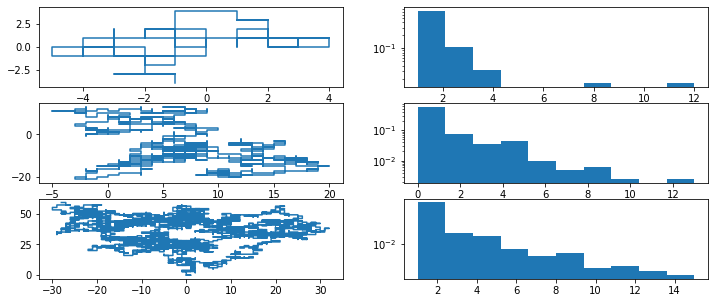

In [5]:
''' Résultats : plot des X_t et des L_i dans le cas d=2 '''

d, T1, T2, T3 = 2, 100, 1000, 5000

x1, y1, x2, y2, x3, y3 = [], [], [], [], [], [] # Il n'y a que 2 dimensions dans ce cas
X1, X2, X3 = ixte(d, T1), ixte(d, T2), ixte(d, T3)
L1, L2, L3 = eli(d,T1,X1), eli(d, T2, X2), eli(d, T3, X3)

for i in range(T1):
    x1.append(X1.values[i][0]) # Abscisses
    y1.append(X1.values[i][1]) # Ordonnées

for i in range(T2):
    x2.append(X2.values[i][0]) 
    y2.append(X2.values[i][1])

for i in range(T3):
    x3.append(X3.values[i][0])
    y3.append(X3.values[i][1])

fig, axs = plt.subplots(3,2,figsize=(12,5))

axs[0,0].plot(x1,y1)
axs[0,1].hist(L1, density=True)
axs[0,1].set_yscale('log')
axs[1,0].plot(x2,y2)
axs[1,1].hist(L2, density=True)
axs[1,1].set_yscale('log')
axs[2,0].plot(x3,y3)
axs[2,1].hist(L3, density=True)
axs[2,1].set_yscale('log')
plt.show()

Au vu des histogrammes, il est difficile de déterminer si la loi se stabilise lorsque T tend vers $+ \infty$. En effet, à part le fait que la valeur $0$ est très fréquente, il est difficile d'apprécier la distribution sur les autres valeurs. Pour remédier à cela, nous allons replotter les mêmes simulations en excluant les cas où $L_i = 0$ (cela revient donc à estimer par Monte Carlo $\mathbb{P}(L = l \mid L > 0)$ pour $l > 0$).

Conditionnellement à $L_i \geq 1$, **la loi semble se stabiliser lorsque la longueur augmente**. Toutefois, étant donné que la queue de la distribution est très fine, on peut penser que **les probabilités d'apparition des grandes et moyennes valeurs de L est très faible**. Ceci est problématique lorsque l'on simule des quantités non-asymptotiques de $L_i$. En effet, la (grande) variance (cf histogrammes réalisés pour T=100) peut être source de piètre performance des estimations par méthode de Monte Carlo. 

De plus, capturer des bonnes estimation de $\mathbb{P}(L_i = l)$ pour $l$ grand peut s'avérer délicat au vu de la peu fréquente apparition des grandes valeurs de L. Cela est d'autant plus difficile que le calcul des $(L_i)_{i \geq 0}$ est coûteux.

On peut ainsi envisager d'améliorer la simulation des $(L_i)_{i \geq 0}$ grâce à des méthodes de réduction de la variance (dans un 1er temps) puis par l'importance sampling (dans un 2e temps).

Avant cela, nous allons quand même vérifier le caractère iid des $(L_i)_{i \geq 0}$, bien que la loi semble se stabiliser avec la longueur de la marche aléatoire, ce qui plaide en la faveur de cette hypothèse.

### 2 - Simulation de $N$ marches aléatoires
Nous relâchons l'hypothèse que les $(L_i)_{i \geq 0}$ sont iid. Nous allons ainsi simuler $N$ trajectoires (avec la méthode classique) de $(X_t)_{t \geq 0}$, et en déduire $N$ familles $(L_{i,j})_{i \geq 0}, \: \: j \in [[1:N]]$.

Ici, l'interprétation des résultats porte sur la loi de $L_i$, $i \in [[0:Q]]$ (on détaille les lois une par une, car on ne veut pas courrir le risque que les $L_i$ ait une loi différente).

Si asymptotiquement les histogrammes des différents $L_i$ sont assez différents, alors cela remet en cause l'hypothèse iid et il faut poursuivre l'étude en étudiant séparément chaque $L_i$.

Pour des raisons de performance, nous allons seulement simuler pour des longueurs de marche aléatoire assez courtes (T inférieur à 1000).


In [6]:
''' Création des N marches aléatoires X_tj '''

N = 500 # On détermine le nombre de marches aléatoires à simuler
d = 2 # On se place en dimension 2
T = 100 # On fixe un horizon de temps limité

X = [] # On crée une liste qui contient les N trajectoires
for j in range(N):
    X.append(ixte(d,T))

In [7]:
''' Calcul des L_ij - approche par troncature au plus petit échantillon '''

L = [] # On crée une liste qui contient les N réalisations des suites L_ij
for j in range(N):
    L.append(eli(d,T,X[j]))

Q = min([len(elt) for elt in L]) # On détermine la taille minimale des suites

L_regroup = pd.DataFrame() # DataFrame permettant de regrouper les L_ij comme réalisations iid (par construction) de L_i. On choisit le format dataframe qui va faciliter les calculs
for i in range(Q): # Pour i allant de 0 à Q-1, on regroupe les L_i
    L_regroup[i] = pd.Series([L[j][i] for j in range(N)]) # On peut noter que L_regroup.T = (L_ij)_i,j

# Chaque colonne contient N réalisations de L_i
# On a ainsi N réalisations de L_i, pour i allant jusqu'à Q

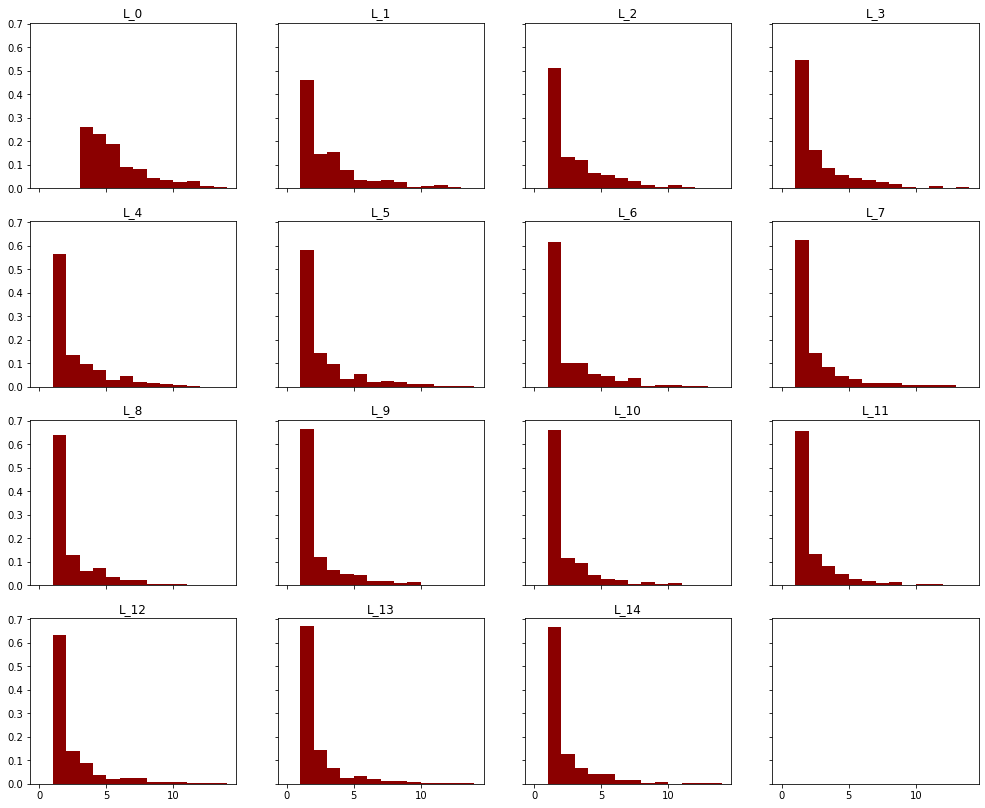

In [8]:
''' Résultats bis : plot des distributions pour L_i, i décrivant plusieurs valeurs '''

# Ici, nous laissons T constant

fig3, axs3 = plt.subplots(4, 4, figsize=(17,14), sharey=True, sharex=True)

for i in range(15):
    axs3[i//4,i%4].hist(L_regroup[np.arange(0,15)[i]], density=True, color='darkred', bins=np.arange(0,15))
    axs3[i//4,i%4].set_title("L_"+str(np.arange(0,15)[i]))

plt.show()

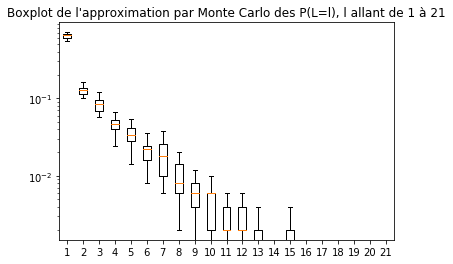

In [63]:
toplot = []
for l in np.arange(1,L_regroup.values.max()):
    tempo = []
    for j in range(Q):
        tempo.append(len(np.where(L_regroup[j] == l)[0])/len(L_regroup))
    toplot.append(np.array(tempo))

figurebox, axebox = plt.subplots()
axebox.boxplot(toplot,sym='')
axebox.set_title('Boxplot de l\'approximation par Monte Carlo des P(L=l), l allant de 1 à '+str(L_regroup.values.max()-1))
axebox.set_yscale('log')
plt.show()

On remarque que $L_0$ a une distribution assez différente des autres $L_i, \: \: i \geq 1$. Aussi, les distributions, bien que grossièrement similaires, **sont assez variables**. Cela est-il dû à la probable absence du caractère iid ? De plus, il n'y a pas de règle générale à l'évolution de ces distributions "dans le temps". Une cause probable de ceci est que $(L_i)_{i \geq 0}$ est très "instable", au sens où les lois de chaque $L_i$ a une forte variance (si elle en a une...).

Il sera en tout cas plus prudent d'étudier séparément les $L_i$ dans ce qui suit.

Outre ceci, les résultats semblent assez similaires aux précédents (queue très fine de la distribution). Nous confirmons qu'il est difficile d'approcher $\mathbb{P}(L_i = l)$ pour $l$ grand.

### 3 - Aparté : les $(L_i)_{i \geq 0}$ sont-ils iid ?

Nous allons à présent utiliser le dataset L_regroup pour tester cette hypothèse.

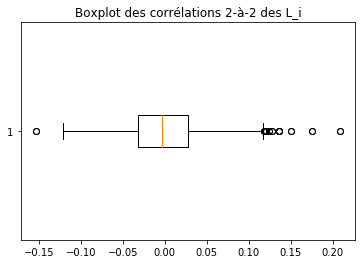

In [14]:
''' Y a-t-il corrélation entre les L_i ? '''

plt.boxplot(L_regroup.corr().values[L_regroup.corr().values != 1.], vert=False)
plt.title('Boxplot des corrélations 2-à-2 des L_i')
plt.show()

La corrélation moyenne est assez faible en moyenne, mais il y a quelques outliers qui nous empêchent de généraliser l'absence de corrélation.

En méconnaissance de test statistique d'indépendance mutuelle, nous allons tester l'indépendance 2-à-2.

In [15]:
''' Test d'indépendance 2-à-2 '''

# On veut une matrice qui regroupe les p-valeurs des tests

ttest = np.zeros((Q,Q))
nbr_grandes_p_values = 0 # On va calculer combien de p-valeurs sont supérieures à 0.05, sur Q^2-Q p-valeurs

for i in range(Q):
    for k in range(Q):
        ttest[i,k] = sct.ttest_ind(L_regroup[i],L_regroup[k])[1]
        if ttest[i,k] != 1 and ttest[i,k] > 0.05:
            nbr_grandes_p_values += 1

nbr_grandes_p_values, nbr_grandes_p_values/(Q**2-Q)

(596, 0.6008064516129032)

Il y a ici une part importante de cas où l'indépendance 2-à-2 est loin d'être garantie.

Maintenant, en ce qui concerne l'aspect d'identique distribution, l'étape est délicate. Les tests de goodness-of-fit reposent généralement sur une connaissance a priori d'une loi. Or, connaître la loi des $L_i$ est l'objet de ce projet. Ici, nous cherchons à savoir si les distributions des $L_i$ sont similaires. Déjà, les séries d'histogrammes calculés précédemment offre une vue approximative du problème. De fait, les lois des $L_i$ sont très variables. 

Nous allons proposer un 'proxy' de test de goodness-of-fit. Nous allons d'abord créer une estimation de loi en moyennant les histogrammes (et en excluant L_0, qui ne peut pas prendre la valeur 0 et donc qui a une loi différente par construction).

Ensuite, nous allons tester une par une l'adéquation à cette loi moyenne.

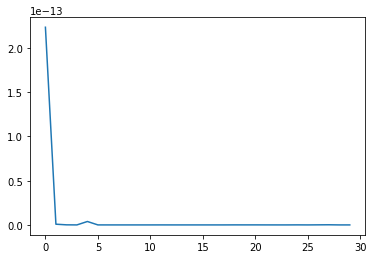

In [16]:
''' Test d'identique distribution '''

# Cette étape est délicate, les résultats seront approximatifs

# On commence par calculer une moyenne d'histogramme, qui sera une estimation (Monte Carlo) de la distribution des L_i.

histos = [np.histogram(L_regroup[i], bins=np.arange(0,15), density=True) for i in range(Q)] # Liste regroupant tous les histogrammes, que l'on borne à 30 pour avoir une uniformité des calculs

distrib_estimate = (pd.DataFrame(histos)[0].mean(),np.arange(0,15)) # Cet objet contient l'estimation. C'est l' "expected value" des histogrammes

# Ensuite on réalise Q-1 tests pour savoir si chacune des variables L_i suit probablement cette loi

chi2 = [] # La liste va contenir toutes les stats des tests du chi2
for i in np.arange(1,Q-1):
    stat = pd.Series(((histos[i][0]-distrib_estimate[0])**2)/distrib_estimate[0]).sum() # On calcule la statistique de test
    chi2.append(stat)

chi2 = pd.Series(chi2)
plt.plot(sct.chi2.cdf(chi2, df=15)) # On plotte la probabilité que le chi2 soit inférieur aux stats (1 - p-valeur).
plt.show()

Au vu de ce plot, il apparaît que de nombreuses variables $L_i$ ne suivent pas la loi estimée. Ainsi, soit la distribution n'est pas identique, soit la variance des $L_i$ est très forte pour d'autres raisons. Dans tous les cas, on ne peut affirmer le caractère iid sans grands risques.

#### Conclusion de la question 1

La première étape concernant la simulation pour des échelles de temps différente est très informative. Les histogrammes semblent se stabiliser lorsque la longueur de la marche aléatoire $t$ est grande. Toutefois, sur des marches aléatoires très longues, il reste difficile d'approcher la réelle distribution des $L_i$ pour de grandes valeurs. Il s'agit d'événements rares (cf. histogrammes 1e étape). La probabilité que $L_i$ prenne de faibles valeurs est très grandes.

Les deuxièmes et troisièmes étapes nous confirment ce résultat ainsi que le fait que la variance des $L_i$ est très forte (en fonction de i, cf. ), et que le caractère $\text{i.i.d.}$ difficile à établir peut en être la cause. Par conséquent, malgré la stabilisation apparente de la loi des $L_i$ sur la longueur de la marche aléatoire (cf première étape), il est dangereux de conclure qu'il y a convergence de l'histogramme vers la loi, car son unicité n'est pas garantie.

Il y a donc deux difficultés :
* La forte variance des $L_i$ : il est peu probable qu'ils soient iid ;
* Les grandes valeurs apparaissent rarement.

Nous allons tenter de résoudre le problème de la variance avec la question 2.

## Question 2 - Amélioration de la simulation par stratification

On cherche à améliorer la simulation (diminution de variance des estimations par Monte Carlo). Pour cela, une première piste est d'appliquer une méthode de Quasi-Monte Carlo, la stratification (Latin Hypercube), qui est proposée dans l'énoncé.

### 1 - Validation de la simulation par stratification

On veut $N$ trajectoires. On sait que $$\begin{align*}  \forall (i,t) \in [[1;N]], \, \mathbb{N} : \quad U_{it} \sim \cal{U}(\underbrace{\begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix},\begin{bmatrix} -1 \\ 0 \\ \vdots \\ 0 \end{bmatrix}, \cdots , \begin{bmatrix} 0 \\ \vdots \\ 0 \\ 1 \end{bmatrix}, \begin{bmatrix} 0 \\ \vdots \\ 0 \\ -1 \end{bmatrix}}_\cal{D}) \end{align*}$$ 

On note $\cal{D}_k$ l'ensemble ordonné contenant $k$ fois chaque élément de D, avec $k$ tel que $2dk = N$.

Au lieu de poser $(X_t)_{t \geq 0} = (\sum_{j=1}^{t}U_j)_{t \geq 0}$, on simule chaque trajectoire $i \in [[1:N]]$ en faisant
$$
\begin{align*}
(X_{it})_{t \geq 0} \: = \: (\sum_{j=1}^{t} perm_j(\cal{D}_k)_i)_{t \geq 0}
\end{align*}
$$

où $perm_j(D_k)$ est la $j^{\text{ème}}$ permutation de $\cal{D_k}$, et $perm_j(\cal{D}_k)_i$ sont $i^{\text{ème}}$ élément.

On veut maintenant savoir si $\forall t \geq 0 , \sum_{j=1}^{t} perm_j(\cal{D}_k)_i$ a la même loi que $\sum_{j=1}^{t} U_{ij}$. On peut alors se cantonner à montrer que 

\begin{align*}
\\
\forall j \in [[1;t]], \begin{cases} perm_j(\cal{D}_k)_i \sim \cal{U}(\cal{D}) 
\\ 
\text{Les permutations sont mutuellement indépendantes} 
\end{cases}
\\
\\
\end{align*}

Par construction, la 2e affirmation est vraie. Quant à la 1e :

\begin{align*}
\forall v \in \cal{D}, \quad \mathbb{P}(perm_j(\cal{D}_k)_i \, = \, v) & = \frac{\text{Nombre de cas favorables}}{\text{Nombre de cas possibles}}
\\ 
\\
&= \frac{\overbrace{k}^{\text{Nombre de vecteurs}
\\ \text{prenant la valeur de v}} \times \overbrace{(2dk - 1)!}^{\text{Nombre de permutations sur les 2dk-1} 
\\ \text{valeurs, après avoir fixé le rang i}}}{(2dk)!} 
\\
\\
&= \frac{1}{2d}
\\
\end{align*}

<br />

Elle est aussi vraie. On en conclue que l'approche par stratification (Latin Hypercube) est valide.

### 2 - Mise en oeuvre de l'approche par stratification



In [64]:
''' Construction des T permutations de D_k '''

def perm_ute(d,k,T):
    # Le début du code est le même que pour simuler les U_t : il faut d'abord générer les directions possibles.

    directions_positives = [] # On crée toutes les directions positives
    for i in range(d): # Pour chaque dimension
        directions_positives.append(np.zeros(d)) # On ajoute la direction où on se déplace de +1 dans la direction i
        directions_positives[i][i] = 1

    directions_negatives = [] # On fait la même chose avec les directions négatives
    for i in range(d):
        directions_negatives.append(np.zeros(d))
        directions_negatives[i][i] = -1

    D = directions_positives + directions_negatives # Il s'agit du support de la loi uniforme.

    D_k = np.array(D*k) # Maintenant on génère D_k, qui a 2dk = N éléments rangés

    perm_U = [np.random.permutation(D_k) for t in range(T)] # Au lieu de simuler un choix parmi 2d possibilité, on simule des permutations aléatoires

    # On peut réfléchir à améliorer la performance de la permutation en utilisant autre chose que la fonction donnée par numpy


    return perm_U # Ce sera une liste d'arrays, chaque élément étant une permutation de D_k, à additionner à X tout entier

In [65]:
''' Construction des marches aléatoires contenues dans perm_X '''

def perm_ixte(d,k,T):
    perm_X = pd.Series(perm_ute(d,k,T)).cumsum().shift(periods=1)
    perm_X[0] = np.array(2*k*d*[np.zeros(d)])
    return perm_X # Séries d'arrays. Chaque array est la situation des N trajectoires au temps t, où t est l'indice de l'array dans la série

# Toutefois nous voulons les N marches aléatoires comme sous un format plus facile à appréhender, un peu comme celui de L_regroup

def perm_ixte_formate(d,k,t):
    perm_X = perm_ixte(d,k,T)
    perm_X_formate = pd.DataFrame()
    for t in range(T):
        serie_tampon = pd.Series([np.zeros(2) for j in range(2*k*d)])
        for j in range(2*k*d):
            serie_tampon[j] = perm_X[t][j]
        perm_X_formate[t] = serie_tampon
    return perm_X_formate


In [70]:
''' Calcul des L_ij - approche par troncature au plus petit échantillon '''

T = 100 # On commence par définir un horizon de temps T
d = 2 # On établit également la dimension du problème
k = 200 # On crée l'entier k
N = 2*d*k

perm_X_check = perm_ixte_formate(d,k,T).applymap(str)
L = [] # On crée une liste qui contient les N réalisations des suites L_ij
for j in range(2*k*d):
    L.append(eli(d,T,perm_X_check.iloc[j,:]))

Q_perm = min([len(elt) for elt in L]) # On détermine la taille minimale des suites

perm_L_regroup = pd.DataFrame() # DataFrame permettant de regrouper les L_ij comme réalisations iid (par construction) de L_i. On choisit le format dataframe qui va faciliter les calculs
for i in range(Q_perm): # Pour i allant de 0 à Q-1, on regroupe les L_i
    perm_L_regroup[i] = pd.Series([L[j][i] for j in range(N)]) # On peut noter que L_regroup.T = (L_ij)_i,j

# Chaque colonne contient N réalisations de L_i
# On a ainsi N réalisations de L_i, pour i allant jusqu'à Q

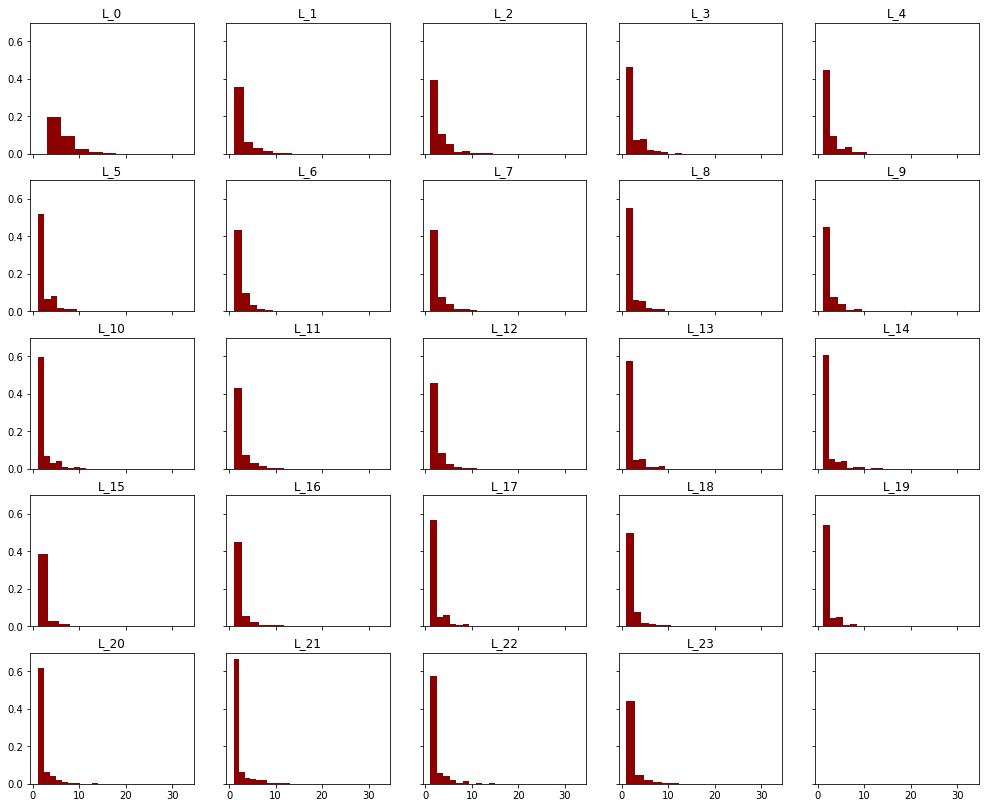

In [23]:
''' Résultats : plots '''

fig5, axs5 = plt.subplots(5, 5, figsize=(17,14), sharey=True, sharex=True)

for i in range(24):
    axs5[i//5,i%5].hist(perm_L_regroup[np.arange(0,Q_perm,)[i]], density=True, color='darkred')
    axs5[i//5,i%5].set_title("L_"+str(np.arange(0,Q_perm)[i]))

plt.show()

### 3 - Comparaison avec l'approche traditionnelle

** On se propose d'abord d'étudier le cas iid.**

On calcule la variance emprique des estimations. Pour cela, on estime donc séparément $\mathbb{P}(L = l)$ par $\frac{1}{N}\sum_{j=1}^{N}L_{i,j} \:, \; i \in [[0,Q]]$. Ceci nous donne donc $Q+1$ estimations, dont on calcule la variance empirique.

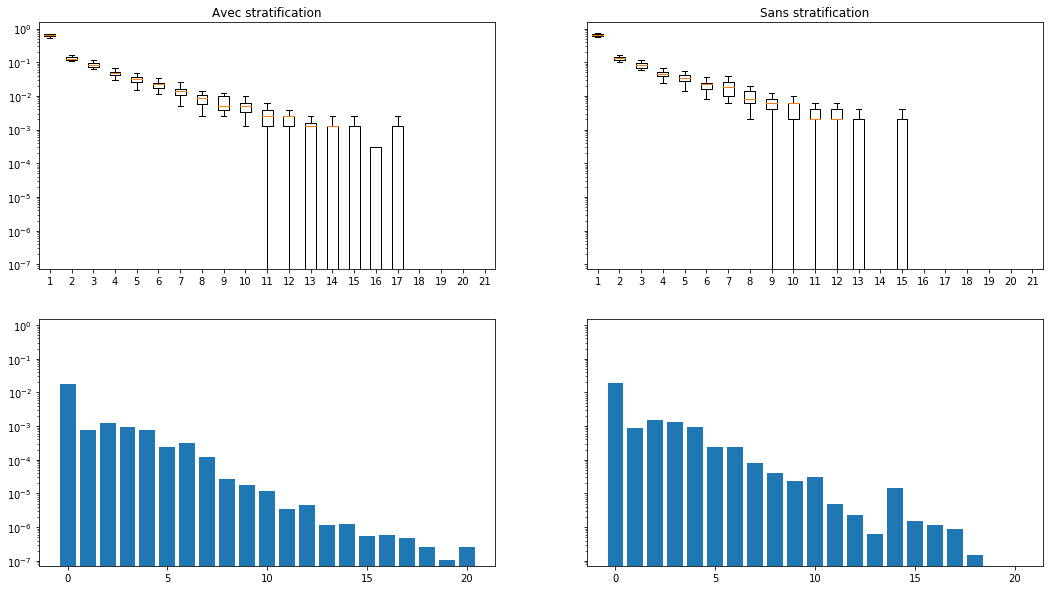

In [100]:
''' En supposant que les L_i sont iid '''

toplotperm = []
for l in np.arange(1,perm_L_regroup.values.max()):
    tempoperm = []
    for j in range(Q_perm):
        tempoperm.append(len(np.where(perm_L_regroup[j] == l)[0])/len(perm_L_regroup))
    toplotperm.append(np.array(tempoperm))

variances = [toplot[0:len(toplot)][l].var() for l in range(len(toplot))]
variances_perm = [toplotperm[0:len(toplotperm)][l].var() for l in range(len(toplotperm))]

figbox, axbox = plt.subplots(2,2,figsize=(18,10),sharey=True)
axbox[0,0].boxplot(toplotperm[0:len(toplot)], sym='')
axbox[0,0].set_title('Avec stratification')
axbox[0,0].set_yscale('log')

axbox[0,1].boxplot(toplot,sym='')
axbox[0,1].set_title('Sans stratification')
axbox[0,1].set_yscale('log')

axbox[1,0].bar(np.arange(len(variances)),variances_perm[0:len(variances)])
axbox[1,0].set_yscale('log')

axbox[1,1].bar(np.arange(len(variances)),variances)
axbox[1,1].set_yscale('log')

plt.show()

On remarque ainsi qu'il y a une réduction de variance effective grâce à la stratification. De plus, cela nous permet d'estimer la quantité voulue pour $l$ plus grand (à noter que l'échelle des graphiques est logarithmique).

** Le cadre non-iid est très long à simuler. **

Ici, nous voulons toujours calculer la variance empirique des estimateurs. Pour cela, nous restreignons l'étude sur des $L_i$ particuliers. On simule N trajectoires, et sachant que $N$ est un multiple de $k$, il faut en théorie découper le résultat en sous-groupe de $\frac{N}{k}$ éléments, voire $\frac{N}{\frac{k}{a}}$ avec $a$ divisant $k$ si $k$ est assez grand.

Toutefois, cela nécessiterait de simuler beaucoup de trajectoires ($N$ très grand) pour avoir des résultats probants. Nous allons donc nous en tenir à l'hypothèse iid.

Par correction, nous présentons quand même un code permettant de simuler de telles variances.

In [ ]:
''' Nous ne faisons pas tourner ce code '''
# On admet que L_regroup et perm_L_regroup sont assez grands, de même taille N = 2*d*k

i = [0,5,10]# On déclare les i pour lesquels on fait l'étude

firstsubsetL = L_regroup.iloc[:,i]
firstsubsetLperm = perm_L_regroup.iloc[:,i] # On restreint l'étude à ces i

subsetL = []
subsetLperm = []
for s in range(k): # Il y aura k sous-groupes
    subsetL.append(firstsubsetL.iloc[s*(N/k):(s+1)*(N/k),:])
    subsetLperm.append(firstsubsetLperm.iloc[s*(N/k):(s+1)*(N/k),:]) # On constitue une liste de sous-dataframes de L_regroup et perm_L_regroup


# Pour chaque subset, on fait une estimation comme précédemment, que l'on stocke dans 2 listes

estimsubsetL = []
estimsubsetLperm = []

for s in range(k): # Pour chaque sous-groupe
    estimsubsetL.append([])
    estimsubsetLperm.append([])
    for elt in i:# Pour chaque L_i
        histoL = np.histogram(subsetL[s].iloc[:,i],bins=np.arange(1,max(firstsubsetL.values.max(),firstsubsetLperm.max())))
        histoLperm = np.histogram(subsetLperm[s].iloc[:,i],bins=np.arange(1,max(firstsubsetL.values.max(),firstsubsetLperm.max()))) # On réalise les estimations
    estimsubsetL[s].append(histoL) # Un histogramme par L_i dans chaque subset
    estimsubsetLperm[s].append(histoLperm)

# On réorganise les estimations pour calculer les variances simplement
# On va calculer la variance pour chaque l et chaque L_i
# esimsubsetL[s][i][l]
# On veut faire matrice[].var()

reorgestimL = []
reorgestimLperm = []
for elt in i: # Pour chaque L_i
    reorgestimL.append([])
    reorgestimLperm.append([])
    for l in np.arange(1,max(firstsubsetL.values.max(),firstsubsetLperm.max())): # Pour chaque l
        reorgestimL[l].append([])
        reorgestimLperm[l].append([])
        for s in range(k): # Pour chaque sous-groupe
            reorgestimL[l][i].append(estimsubsetL[s][i][l])
            reorgestimLperm[l][i].append(estimsubsetLperm[s][i][l])

variancespasiidL = []
variancespasiidLperm = []
for elt in i:
    tampon = []
    tamponperm = []
    for l in np.arange(1,max(firstsubsetL.values.max(),firstsubsetLperm.max())): # Pour chaque l
        tampon.append(np.array(reorgestimL[l][i]).var())
        tamponperm.append(np.array(reorgestimLperm[l][i]).var())
    variancespasiidL.append(np.array(tampon))
    variancespasiidLperm.append(np.array(tamponperm))

fic,axfic = plt.subplots(len(i),1,figsize=(8,5*len(i)))
for elt in i:
    axfic[elt].bar(np.arange(len(variancespasiidL[elt])),variancespasiidL[elt])
    axfic[elt].set_scale('log')

plt.show()

## Question 3 - Importance sampling

Nous voulons maintenant approcher $\mathbb{P}(L_i \geq l)$.

### 1 - Lorsque $t$ grand et $l \leq t$ proche de $t$, ${L_i \geq l}$ est extrêmement peu réalisé

Il devient alors difficile d'avoir une approximation correcte. En effet, sur l'espace probabilisé $(\Omega,\sigma((X_k)_{k \leq t}), \mathbb{P})$,

$$
\begin{align*}
\bigcup_{i=0}^{\infty}\{L_i \geq l\} & = \bigcup_{a=1}^{t-l} \bigcap_{b=a}^{b+a-1} \overline{AS_b} \\
\Rightarrow \mathbb{P}(\bigcup_{i=0}^{\infty}\{L_i \geq l\}) &= \mathbb{P}(\bigcup_{a=1}^{t-l} \bigcap_{b=a}^{b+a-1} \overline{AS_b}) \\
&\leq \sum_{a=1}^{t-l}\prod_{b=a}^{l+a-1}\mathbb{P}(\overline{AS_b}) \\
&\leq (t-l)(\frac{2d-1}{2d})^l \underset{l \rightarrow t \: \text{ou} \: \infty}{\longrightarrow} 0
\end{align*}
$$

est très petit.

Par importance sampling, nous voulons simuler plus souvent ces événements et les repondérer dans l'estimation.

### 2 - Importance sampling avec différentes lois de proposition

L'écueil de l'approche est que nous ne connaissons pas la distribution des $(L_i)_{i \geq 0}$, même à une constante près. Analytiquement, elle est dure à déterminer. Aussi, l'énoncé ne précise pas quel $L_i$ en particulier nous devrions étudier. Nous pourrions les étudier tous un par un (jusqu'à un temps raisonnable). Mais l'objet de l'étude est d'avantage d'offrir une idée générale de "lors d'une marche aléatoire, quelle est la probabilité qu'une variable $L_i$ (n'importe laquelle) dépasse $l$ ?".

Pour cela, nous posons une nouvelle suite de variable $(L_t^{'})_{t\geq0}$ telle que $\forall t\geq0, L_t^{'} = \frac{card(\{L_i : L_i > l \: \text{et} \: i < t\})}{card(\{L_i : i<t\})}$. Cette nouvelle suite compte tout simplement la proportion de longueurs parcourues sans auto-section qui sont supérieures à l dans le total des longueurs parcourues sans auto-section, sur une marche aléatoire réalisée jusqu'au temps t (on peut noter que $L_t^{'}$ dépend de $l$).

On peut évidemment poser $h$ telle que $\forall t \geq 0, L_t^{'} = h(U_1, ... , U_t)$. On a alors

\begin{align*}
\forall t \geq 0, \mathbb{E}[L_t^{'}] = \mathbb{E}[h(U_1, ... , U_t)] = \mathbb{P}(\exists L_i : L_i > l, i < t)
\end{align*}

ce que l'énoncé nous invite à étudier. L'importance sampling consiste en approcher cette valeur par 

\begin{align*}
Î_{IS} = \frac{1}{N}\sum_{n=1}^{N}h(U_{1,j}^{'},...,U_{t,j}^{'})\frac{\mathbb{P}(U_1^{\text{théorique}} = U_{1,j}^{'}, \cdots, U_t^{\text{théorique}}= U_{t,j}^{'})}{\mathbb{P}(G_1 = U_{1,j}^{'}, \cdots, G_t = U_{t,j}^{'})} \overset{\text{iid}}{=} \frac{1}{N}\sum_{j=1}^N\frac{L_{t,j}^{'}}{(2d)^t\: \mathbb{P}(G_1 = U_{1,j}, \cdots, G_t = U_{t,j})}
\end{align*}

où $G$ est un vecteur suivant une loi de proposition, $U_i^{'} \quad(1 \leq i \leq t)$ suit cette loi, et U^{\text{théorique}} suit la loi uniforme de départ.

Modifier la distribution des $U_i$ revient à appliquer des poids différent dans le choix des directions, pour "biaiser" les trajectoires. On veut repasser peu de fois par les mêmes points et modifier les poids en conséquence.

#### Propositions

Avant tout, la stratégie consistant à ne se faire déplacer la marche aléatoire que dans une position ou que dans des directions positives est dégénérée : il n'y aura pas d'autosection. On ne peut donc pas l'utiliser. Sachant ceci, voici nos propositions de lois :


1. Mettre plus de poids sur les directions positives (résultant en un "drift")

2. On met plus de poids "au bord" (plus l'index de la direction est proche de d, moins elle sera choisie)

3. On met plus de poids "au début" (beaucoup de poids sur les directions à index proche de 1, donc positives, et moins de poids sur les directions d'index proche de 2d, donc négatives)

In [101]:
''' Lois de proposition '''

directions_positives = []
for i in range(d):
    directions_positives.append(np.zeros(d))
    directions_positives[i][i] = 1

directions_negatives = [] 
for i in range(d):
    directions_negatives.append(np.zeros(d))
    directions_negatives[i][i] = -1

def propal1(d,T):

    directions_positives = []
    for i in range(d):
        directions_positives.append(np.zeros(d))
        directions_positives[i][i] = 1

    directions_negatives = [] 
    for i in range(d):
        directions_negatives.append(np.zeros(d))
        directions_negatives[i][i] = -1

    # On répète les mêmes premières étapes pour avoir le même support

    D = directions_positives + directions_negatives # Il s'agit du support de la loi uniforme.

    # Il faut distordre le choix, et donc ne pas utiliser np.random.choice

    rng = np.random.default_rng()
    p = (1/d)*np.array([0.8]*d + [0.2]*d) # On prend une dimension sur 2
    choix = rng.choice(2*d,T,p=p)

    U = [D[choix[t]] for t in range(T)]
    U = pd.Series(U)
    return U

p1 = (1/d)*np.array([0.8]*d + [0.2]*d)

def propal2(d,T):

    directions_positives = []
    for i in range(d):
        directions_positives.append(np.zeros(d))
        directions_positives[i][i] = 1

    directions_negatives = [] 
    for i in range(d):
        directions_negatives.append(np.zeros(d))
        directions_negatives[i][i] = -1

    # On répète les mêmes premières étapes pour avoir le même support

    D = directions_positives + directions_negatives # Il s'agit du support de la loi uniforme.

    # Il faut distordre le choix, et donc ne pas utiliser np.random.choice

    rng = np.random.default_rng()
    p = np.array([(i-d)**2 for i in range(2*d)]) # Les directions plus fréquemment sélectionnées seront "au bord"
    p = p / p.sum()
    choix = rng.choice(2*d,T,p=p)
    
    U = [D[choix[t]] for t in range(T)]
    U = pd.Series(U)
    return U

p2 = np.array([(i-d)**2 for i in range(2*d)])
p2 = p2/p2.sum()

def propal3(d,T):

    directions_positives = []
    for i in range(d):
        directions_positives.append(np.zeros(d))
        directions_positives[i][i] = 1

    directions_negatives = [] 
    for i in range(d):
        directions_negatives.append(np.zeros(d))
        directions_negatives[i][i] = -1

    # On répète les mêmes premières étapes pour avoir le même support

    D = directions_positives + directions_negatives # Il s'agit du support de la loi uniforme.

    # Il faut distordre le choix, et donc ne pas utiliser np.random.choice

    rng = np.random.default_rng()
    p = np.array([np.exp(-i) for i in range(2*d)])
    p /= p.sum()
    choix = rng.choice(2*d,T,p=p) # On applique une transformation exp(-i) pour mettre plus de poids sur les 1e directions et moins sur les dernières.

    U = [D[choix[t]] for t in range(T)]
    U = pd.Series(U)
    return U

p3 = np.array([np.exp(-i) for i in range(2*d)])
p3 /= p3.sum()

In [102]:
''' Importance sampling'''

def importance_sampling(d,T,N,l,p1,proposition):
    # Ici nous décidons de ne pas encapsuler les calculs dans des fonctions pour garder les valeurs de U' sans souci, dont on a besoin pour la formule de l'importance sampling

    # On recode une nouvelle marche aléatoire qui ne se base plus sur la fonction ute qui simulait une uniforme, mais qui se base sur les fonction propal
    U1 = []
    X1 = []
    for j in range(N):
        U1.append(proposition(d,T))
        X1elt = U1[j].cumsum().shift(periods=1) # On calcule les X_t selon la méthode traditionnelle
        X1elt[0] = np.zeros(d) # On pose X_0 = 0
        X1.append(X1elt)

    L = []
    for j in range(N):
        L.append(eli(d,T,pd.Series(X1[j])))

    Q1 = min([len(elt) for elt in L])

    L_regroup1 = pd.DataFrame()
    for i in range(Q1):
        L_regroup1[i] = pd.Series([L[j][i] for j in range(N)])

    eltejiprime1 = [] # On calcul L_tj_prime (t est ici fixé égal à T) pour j allant de 1 à N
    for j in range(N):
        eltejiprime1.append(np.count_nonzero(np.array(L_regroup1.iloc[j,:]) > l)/len(L_regroup1.columns))

    eltejiprime1 = pd.Series(eltejiprime1)

    directions_positives = []
    for i in range(d):
        directions_positives.append(np.zeros(d))
        directions_positives[i][i] = 1

    directions_negatives = [] 
    for i in range(d):
        directions_negatives.append(np.zeros(d))
        directions_negatives[i][i] = -1 # Pour faire les correspondances avec les valeurs des U_i prime on explicite l'ordre des directions et le probas correpondantes

    D = directions_positives + directions_negatives # Les directions ordonnées

    estimateur1, variance1 = 0, 0
    for j in range(N): # On calcule d'abord l'estimateur
        denominateur = 1
        for direc in range(2*d):
            denominateur *= p1[direc]**(((U1[j].map(str) == str(D[direc])).values * 1).sum())
        terme = eltejiprime1[j]*(denominateur*2*d)
        estimateur1 += terme
    estimateur1 /= N

    for j in range(N): # On calcule aussi sa variance asymptotique, cela nous sera utile pour plus tard
        denominateur = 1
        for direc in range(2*d):
            denominateur *= p1[direc]**(((U1[j].map(str) == str(D[direc])).values * 1).sum())
        terme = (eltejiprime1[j]*(denominateur*2*d) - estimateur1)**2
        variance1 += terme
    variance1 /= N

    return estimateur1, variance1

### 3 - Comparaison des différentes lois

Nous allons comparer les variances asymptotiques de chaque estimateur. En effet,

\begin{align*}
\sqrt{n}(Î_{IS}-I) \longrightarrow \cal N \rm (0,\mathbb{V}[h(U_1^{'}, ... , U_t^{'})\frac{\mathbb{P}(U_1^{\text{théorique}}=U_1^{'}, ... , U_t^{\text{théorique}}=U_t^{'})}{\mathbb{P}(G_1=U_1^{'}, ... , G_t=U_t^{'})}])
\\
\end{align*}


Nous allons approcher cette variance par 

\begin{align*}
\frac{1}{N}\sum_{j=1}^N (\frac{L_{t,j}^{'}}{2d \: \mathbb{P}(G_1=U_1^{'}, ... , G_t=U_t^{'})} - Î_{IS})^2
\end{align*}

pour différentes valeurs de l.

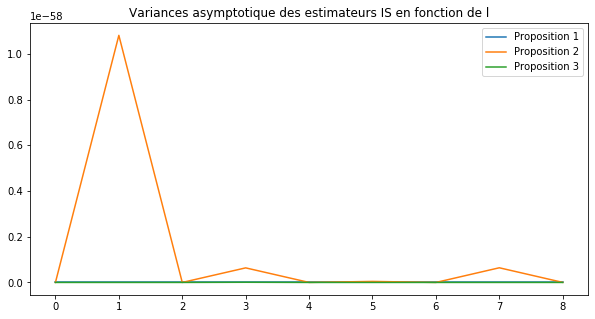

In [103]:
''' Simulation pour 30 seuils l différents '''
N = 200
d = 2 
T = 100 
l = np.arange(1,10)

fig8, axs8 = plt.subplots(figsize=(10,5))

varprop1, varprop2, varprop3 = [],[],[]

for petitel in l:
    varprop1.append(importance_sampling(d,T,N,petitel,p1,propal1)[1])
    varprop2.append(importance_sampling(d,T,N,petitel,p2,propal2)[1])
    varprop3.append(importance_sampling(d,T,N,petitel,p3,propal3)[1])

axs8.plot(varprop1, label="Proposition 1")
axs8.plot(varprop2, label="Proposition 2")
axs8.plot(varprop3, label="Proposition 3")
axs8.set_title("Variances asymptotique des estimateurs IS en fonction de l")
plt.legend()
plt.show()

On remarque que l'estimateur offrant la meilleure variance asymptotique est de manière générale celui de la proposition 3.